In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\batch -3\Machine learning project\Project 22 Mental Health Prediction\Mental Health Dataset.csv')
df.shape

(292364, 17)

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.shape

(292364, 17)

In [5]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

In [7]:
numeric_columns

Index([], dtype='object')

In [8]:
non_numeric_columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [9]:
df = df.dropna(how='any')

In [10]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [11]:
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
columns_to_encode = [
    'Gender', 'Occupation', 'self_employed', 'family_history', 'treatment',
    'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
    'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options', 'Country'
]

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [14]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,8/27/2014 11:43,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,8/27/2014 11:49,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,8/27/2014 11:51,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,8/27/2014 11:52,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [15]:
df=df.drop('Timestamp',axis=1)



In [16]:
df=df.drop('Country',axis=1)

In [17]:
df.head()

,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
x = df.drop(columns=['treatment'])
y = df['treatment']

In [19]:
print(x)

        Gender  Occupation  self_employed  family_history  Days_Indoors  \
3            0           1              0               1             0   
4            0           1              0               1             0   
5            0           1              0               0             0   
6            0           1              0               1             0   
7            0           1              0               0             0   
...        ...         ...            ...             ...           ...   
292359       1           0              1               1             1   
292360       1           0              0               1             1   
292361       1           0              0               1             1   
292362       1           0              0               1             1   
292363       1           0              0               1             1   

        Growing_Stress  Changes_Habits  Mental_Health_History  Mood_Swings  \
3                    

In [20]:
print(x.shape)

(287162, 14)


In [21]:
print(y)

3         1
4         1
5         1
6         1
7         0
         ..
292359    1
292360    1
292361    0
292362    1
292363    1
Name: treatment, Length: 287162, dtype: int32


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=2)
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [23]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.723848534577698


In [24]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.6957846534222485


In [25]:
# Evaluate the model
conf_matrix = confusion_matrix(ytest, xtest_prediction)
class_report = classification_report(ytest, xtest_prediction)

In [26]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67     28561
           1       0.68      0.76      0.71     28872

    accuracy                           0.70     57433
   macro avg       0.70      0.70      0.69     57433
weighted avg       0.70      0.70      0.69     57433



In [27]:
print("\nClassification Report:\n", conf_matrix)


Classification Report:
 [[18112 10449]
 [ 7023 21849]]


In [28]:
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [29]:
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.7191335991503143


In [30]:
input_data = (0,1,0,1,0,2,1,2,2,0,1,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is Mental Health')

else:
  print('The person is not Mental Health')


[1]
The person is Mental Health


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [31]:
import pickle


filename = 'Mental health prediction.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open('Mental health prediction.sav', 'rb'))

for column in df.columns:
    print(column)

Gender
Occupation
self_employed
family_history
treatment
Days_Indoors
Growing_Stress
Changes_Habits
Mental_Health_History
Mood_Swings
Coping_Struggles
Work_Interest
Social_Weakness
mental_health_interview
care_options


In [32]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
from sklearn import svm

In [34]:
### 1. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print("KNN Accuracy:", accuracy_score(ytest, knn_pred))

KNN Accuracy: 0.6544321209060993


In [35]:
### 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(dt_pred,ytest ))

Decision Tree Accuracy: 0.6907875263350338


In [36]:
### 4. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:03:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7173402051085613


In [37]:
# Classification Report
print("\nXGBClassifier Classification Report:\n", classification_report(ytest,xgb_pred ))


XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70     28561
           1       0.69      0.78      0.74     28872

    accuracy                           0.72     57433
   macro avg       0.72      0.72      0.72     57433
weighted avg       0.72      0.72      0.72     57433



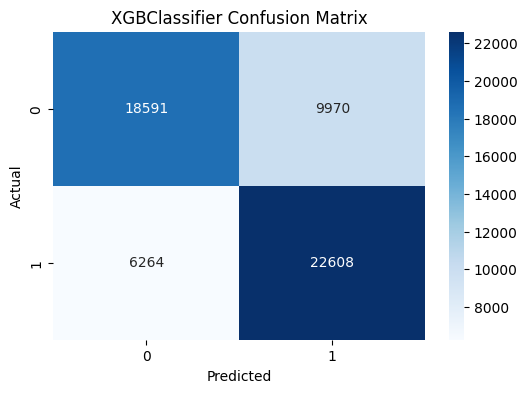

In [38]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xgb_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("XGBClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression
logs = LogisticRegression()
logs.fit(xtrain,ytrain)
y_pre = logs.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

0.7063883133390211

In [40]:
from sklearn import svm
# Train the model
model = svm.SVC(kernel='linear')
model.fit(xtrain, ytrain)
y_pre = model.predict(xtest)
accuracy = accuracy_score(ytest,y_pre)
accuracy

KeyboardInterrupt: 

In [41]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.6755697943690909


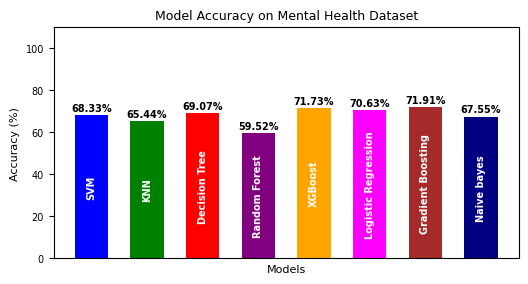

In [43]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [68.33, 65.44, 69.07, 59.52, 71.73, 70.63, 71.91,67.55]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'brown','navy'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on Mental Health Dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()